In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor,LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.decomposition import PCA
import datetime as dt
from datetime import timedelta

In [136]:
train= pd.read_excel('Data_Train.xlsx')
test= pd.read_excel('Data_Test.xlsx')

In [140]:
train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,#GIRLBOSS,Sophia Amoruso,"Paperback,– 29 Sep 2015",3.9 out of 5 stars,17 customer reviews,In the New York Times bestseller that the Wash...,Entrepreneurship,"Computing, Internet & Digital Media",400.44
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


In [139]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [144]:
train['Reviews']= train['Reviews'].apply(lambda x: x.split()[0])
train['Ratings']= train['Ratings'].apply(lambda x: x.split()[0])
test['Reviews']= test['Reviews'].apply(lambda x: x.split()[0])
test['Ratings']= test['Ratings'].apply(lambda x: x.split()[0])

In [145]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,#GIRLBOSS,Sophia Amoruso,"Paperback,– 29 Sep 2015",3.9,17,In the New York Times bestseller that the Wash...,Entrepreneurship,"Computing, Internet & Digital Media",400.44
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [146]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4,960,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0,1,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [149]:
train['Reviews']= train['Reviews'].astype('float64')
test['Reviews']= test['Reviews'].astype('float64')

In [150]:
def fix_ratings(blob):
    temp = blob.split(',')
    if len(temp) == 1:
        return temp[0]
    else:
        result = ''
        for i in temp:
            result = result+i
        return result

In [151]:
train['Ratings'] = train['Ratings'].apply(fix_ratings)
test['Ratings'] = test['Ratings'].apply(fix_ratings)

In [153]:
train['year']= train['Edition'].apply(lambda x: x.split()[-1])
test['year']= test['Edition'].apply(lambda x: x.split()[-1])

In [155]:
train['year'].unique()

array(['2016', '2012', '2015', '2017', '2006', '2009', '2018', '1999',
       '2002', '1991', '2014', '2011', '1989', '2013', '2000', '2005',
       '2019', '2008', '2010', '2004', '2007', '2001', '1969', '2003',
       '1996', 'Import', '1982', '1997', '1995', 'NTSC', '1987', '1992',
       '1986', '1990', '1988', '1993', '1981', '1976', '1994', '1998',
       '1980', '1974', '1983', '1971', '1985', '1978', 'Facsimile', 'set',
       'Edition', '1964', '1984', 'Unabridged', '1979', 'Print', '1960',
       '1970', '1975', '1905', '1900', 'Audiobook', '1961', '1925',
       '1977', '1973'], dtype=object)

In [156]:
train['Ratings']= train['Ratings'].astype('int32')
test['Ratings']= test['Ratings'].astype('int32')

In [157]:
def correction(col):
    if col[0] not in [str(i) for i in range (0,10)]:
        return '0000'
    else:
        return col

In [158]:
train['year']= train['year'].apply(correction)
test['year']= test['year'].apply(correction)

In [159]:
train['year']= train['year'].astype('int64')
test['year']= test['year'].astype('int64')

In [160]:
train['Binding']= train['Edition'].apply(lambda x: x.split('-')[0].split(',')[0])
test['Binding']= test['Edition'].apply(lambda x: x.split('-')[0].split(',')[0])

In [162]:
def corr(col):
    if col[0]== '(':
        return 'Hardcover'
    else:
        return col

In [163]:
train['Binding']= train['Binding'].apply(corr)
test['Binding']= test['Binding'].apply(corr)

In [164]:
test['Binding'].unique()

array(['Mass Market Paperback', 'Paperback', 'Hardcover', 'Cards',
       'Sheet music', 'Flexibound', 'Spiral', 'Loose Leaf'], dtype=object)

In [166]:
train.drop(['Title', 'Author', 'Edition'], axis=1,inplace=True)
test.drop(['Title', 'Author', 'Edition'], axis=1,inplace=True)

In [167]:
train.drop(['Synopsis','Genre'],axis=1, inplace=True)
test.drop(['Synopsis','Genre'],axis=1, inplace=True)

In [169]:
test.columns

Index(['Reviews', 'Ratings', 'BookCategory', 'year', 'Binding'], dtype='object')

In [37]:
df.head()

,Reviews,Ratings,BookCategory,Price,year,Binding
0,4.0,8,Action & Adventure,220.00,2016,Paperback
1,3.9,14,"Biographies, Diaries & True Accounts",202.93,2012,Paperback
2,3.9,17,"Computing, Internet & Digital Media",400.44,2015,Paperback
3,4.1,13,"Crime, Thriller & Mystery",180.00,2017,Paperback
4,5.0,1,"Arts, Film & Photography",965.62,2006,Hardcover


In [170]:
train['Reviews']= train['Reviews']/5
test['Reviews']= test['Reviews']/5

In [172]:
train= pd.get_dummies(train, columns=['BookCategory','Binding'],drop_first=True)
test= pd.get_dummies(test, columns=['BookCategory','Binding'],drop_first=True)

In [176]:
train['year']= 2021-train['year']
test['year']= 2021-test['year']

In [177]:
train

,Reviews,Ratings,Price,year,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,...,Binding_Library Binding,Binding_Loose Leaf,Binding_Mass Market Paperback,Binding_Paperback,Binding_Perfect Paperback,Binding_Plastic Comb,Binding_Product Bundle,Binding_Sheet music,Binding_Spiral,Binding_Tankobon Softcover
0,0.80,8,220.00,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.78,14,202.93,9,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.78,17,400.44,6,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.82,13,180.00,4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1.00,1,965.62,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,1.00,2,322.00,3,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6233,0.66,9,421.00,5,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6234,0.76,3,399.00,15,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6235,0.70,4,319.00,6,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [178]:
test

,Reviews,Ratings,year,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Binding_Flexibound,Binding_Hardcover,Binding_Loose Leaf,Binding_Mass Market Paperback,Binding_Paperback,Binding_Sheet music,Binding_Spiral
0,0.88,960,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1.00,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.00,4,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.82,11,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.88,9,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1.00,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1556,0.72,13,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1557,0.80,5,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1558,0.70,3,2021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [182]:
train.columns

Index(['Reviews', 'Ratings', 'Price', 'year',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Binding_Cards',
       'Binding_Flexibound', 'Binding_Hardcover', 'Binding_Leather Bound',
       'Binding_Library Binding', 'Binding_Loose Leaf',
       'Binding_Mass Market Paperback', 'Binding_Paperback',
       'Binding_Perfect Paperback', 'Binding_Plastic Comb',
       'Binding_Product Bundle', 'Binding_Sheet music', 'Binding_Spiral',
       'Binding_Tankobon Softcover'],
      dtype='object')

In [183]:
feat= ['Reviews', 'Ratings', 'year',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Binding_Cards',
       'Binding_Flexibound', 'Binding_Hardcover', 'Binding_Leather Bound',
       'Binding_Library Binding', 'Binding_Loose Leaf',
       'Binding_Mass Market Paperback', 'Binding_Paperback',
       'Binding_Perfect Paperback', 'Binding_Plastic Comb',
       'Binding_Product Bundle', 'Binding_Sheet music', 'Binding_Spiral',
       'Binding_Tankobon Softcover']

In [184]:
X= train[feat]
y= train['Price']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(4365, 27)

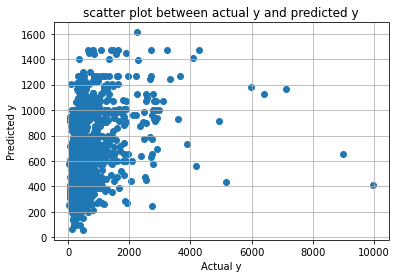

RMSE: 600.300158


In [187]:
lr_regressor =LinearRegression()
lr_regressor.fit(X_train, y_train)
preds = lr_regressor.predict(X_test)
plt.scatter(y_test,preds)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [188]:
lasso_params = {'alpha':[0.005,0.001, 0.02, 0.03, 0.05, 0.06]}
laso_regressor=Lasso()
laso_regressor_cv=GridSearchCV(laso_regressor,lasso_params,cv=5)
laso_regressor_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",laso_regressor_cv.best_params_)
print("accuracy :",laso_regressor_cv.best_score_)

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27220336.945512295, tolerance: 183611.12430940938
  model = cd_fast.enet_coordinate_descent(
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15262648.437498808, tolerance: 170119.3645063734
  model = cd_fast.enet_coordinate_descent(
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6327448.248187304, tolerance: 183375.67693639576
  model = cd_fast.enet_coordinate_descent(
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

tuned hpyerparameters :(best parameters)  {'alpha': 0.001}
accuracy : 0.14380933625662334


C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243158198.84772527, tolerance: 217957.8009262631
  model = cd_fast.enet_coordinate_descent(


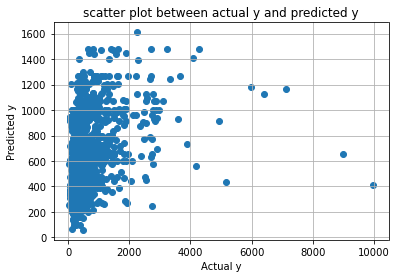

RMSE: 600.323918


In [189]:
laso_regressor =Lasso(alpha= 0.06)
laso_regressor.fit(X_train, y_train)
preds = laso_regressor.predict(X_test)
plt.scatter(y_test,preds)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [190]:
rf_regressor= RandomForestRegressor()
hyperparam_grid={"n_estimators": [10, 50, 100],"max_features": ["sqrt", "log2", 0.4, 0.5],\
                 "min_samples_leaf": [1, 3, 5],'max_depth':[5,10,15,30]}
rf_regressor_cv = GridSearchCV(rf_regressor,hyperparam_grid,cv=2)
rf_regressor_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",rf_regressor_cv.best_params_)
print("accuracy :",rf_regressor_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 30, 'max_features': 0.4, 'min_samples_leaf': 5, 'n_estimators': 50}
accuracy : 0.18426660529571232


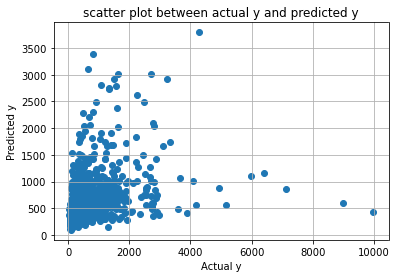

RMSE: 615.361575


In [191]:
rf_regressor=RandomForestRegressor(max_depth= 15,max_features= 0.4, min_samples_leaf= 1, n_estimators=50)
rf_regressor.fit(X_train,y_train)

preds = rf_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
plt.scatter(y_test,preds)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print("RMSE: %f" % (rmse))

[7.74305829e-02 5.06360658e-02 4.92900082e-02 4.80237270e-02
 4.68436707e-02 4.48456374e-02 4.39555434e-02 4.32024147e-02
 4.27678872e-02 4.19730805e-02 4.10615962e-02 3.93507427e-02
 3.87112262e-02 3.84821239e-02 3.83957637e-02 3.79409939e-02
 3.75277585e-02 3.70380839e-02 3.68547305e-02 3.48164525e-02
 3.42908332e-02 3.24253127e-02 3.00393317e-02 2.84323426e-02
 5.63354481e-03 3.05451266e-05 6.07641237e-34]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

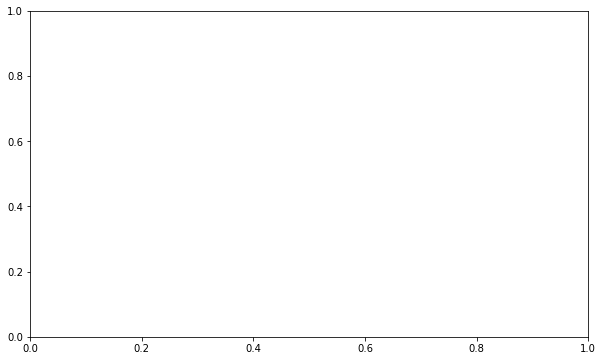

In [200]:
# Build PCA using standarized trained data
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(range(1, 27), pca.explained_variance_ratio_, align="center",
        color='red', label="Individual explained variance")
plt.step(range(1, 27), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.xticks(range(1, 27))
plt.legend(loc="best")
plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16});
print(cum_var_exp)

[16 17 21 18 22 14 13 26 24 25 11  4 19  7  8 12  9  5 10  3 20 15  6 23
  0  1  2]
[ 2  1  0 23  6 15 20  3 10  5  9 12  8  7 19  4 11 25 24 26 13 14 22 18
 21 17 16]


ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of ticklabels (27).

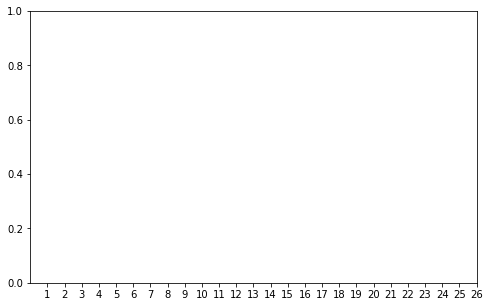

In [201]:
feature_importance = rf_regressor.feature_importances_
print(np.argsort(rf_regressor.feature_importances_))
indices = np.argsort(rf_regressor.feature_importances_)[::-1]
print(indices)
plt.figure(figsize=(8, 5))
plt.xticks(range(1,27), X.columns[indices], rotation=90)
plt.bar(range(1, 27), feature_importance[indices], align="center")
plt.title("Feature Importance", {"fontsize": 16});

In [202]:
xgb_regressor=xgb.XGBRegressor()

n_estimators = [100, 500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    }

# Set up the random search with 4-fold cross validation
xgb_regressor_cv = RandomizedSearchCV(estimator=xgb_regressor,
            param_distributions=hyperparameter_grid,
            cv=2,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True,
            random_state=42)
xgb_regressor_cv.fit(X_train,y_train)
xgb_regressor_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

[16:14:51] WARNING: d:\build\xgboost\xgboost-1.3.3.git\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


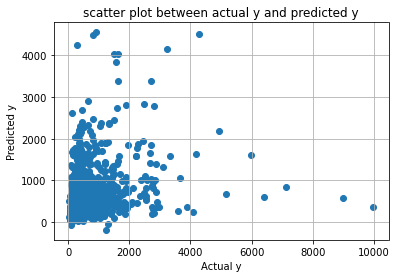

RMSE: 677.580351


In [203]:
#regressor=xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.1, booster='gbtree', base_score=0.25)
xgb_regressor= xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_regressor.fit(X_train,y_train)

preds = xgb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
plt.scatter(y_test,preds)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print("RMSE: %f" % (rmse))

In [204]:
#outliers
xgb_regressor.feature_importances_

array([2.9556581e-03, 3.5511106e-03, 5.5040205e-03, 8.5540675e-03,
       2.2372471e-03, 1.0482342e-02, 3.1023515e-02, 1.7394137e-03,
       3.8257081e-03, 6.4757187e-03, 1.9654691e-02, 1.1406848e-03,
       1.0001151e-02, 1.5835311e-03, 1.8538933e-03, 1.9223133e-02,
       0.0000000e+00, 3.2956912e-05, 2.0778476e-05, 2.0738179e-03,
       1.3086281e-03, 6.9933940e-06, 1.7705871e-03, 8.6134440e-01,
       6.3233980e-04, 2.7292629e-03, 2.7433637e-04], dtype=float32)

In [211]:
estimators = {"Lasso Regressor": laso_regressor,
              "Random Forest Regressor": rf_regressor,
              "XGB Regressor": xgb_regressor}
for estimator in estimators.keys():
    print('RMSE {}:{:.2f}'.format(estimator,np.sqrt(mean_squared_error(y_test, estimators[estimator].predict(X_test)))))

RMSE Lasso Regressor:600.32
RMSE Random Forest Regressor:615.36
RMSE XGB Regressor:677.58


In [212]:
test= sc.transform(test)
display(len(test))
Y_pred = xgb_regressor.predict(test)
display(len(Y_pred))

ValueError: X has 20 features, but this StandardScaler is expecting 27 features as input.

In [216]:
test.columns

Index(['Reviews', 'Ratings', 'year', 'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Binding_Flexibound',
       'Binding_Hardcover', 'Binding_Loose Leaf',
       'Binding_Mass Market Paperback', 'Binding_Paperback',
       'Binding_Sheet music', 'Binding_Spiral'],
      dtype='object')